# Dataset visualization notebook
This notebook that visualize the custom dataset that was written into the hard drive for sanity checking
Reference:
- [https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch](https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch)
- [https://www.kaggle.com/code/jeanpat/minimalist-mask-to-coco-format-dataset-conversion](https://www.kaggle.com/code/jeanpat/minimalist-mask-to-coco-format-dataset-conversion)

In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image

In [5]:
%matplotlib inline

# Instance segmentation dataset

In [6]:
# coco = COCO('/jupyter-users-home/tan-2enguyen/datasets/detectron2/coco/annotations/instances_val2017.json')
# img_dir = "/jupyter-users-home/tan-2enguyen/datasets/detectron2/coco/val2017"

coco = COCO("/jupyter-users-home/tan-2enguyen/datasets/pathology/pannuke/pannuke_coco/annotations/instances.json")
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/pannuke/pannuke_coco/images"

image_id = 1

img = coco.imgs[image_id]
print(img)

loading annotations into memory...
Done (t=0.71s)
creating index...
index created!
{'licese': 1, 'file_name': '1.jpg', 'coco_url': '', 'height': 256, 'width': 256, 'date_captured': '', 'flickr_url': '', 'id': 1}


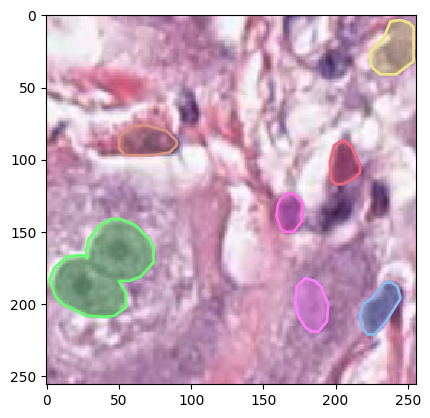

In [7]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')

cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

plt.show()


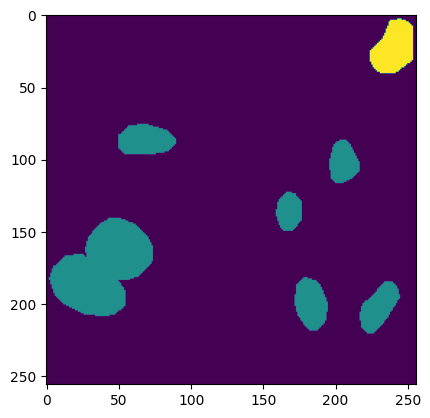

In [8]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)

In [50]:
coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/arch/arch_coco/annotations/captions.json')
image_id = 1438

#coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/detectron2/coco/annotations/captions_val2017.json')
#image_id = 397133
img = coco_captions.imgs[image_id]
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/arch/arch_coco/images"


# Get the ids of the captions
caption_annotation_ids = coco_captions.getAnnIds(imgIds=image_id)
print(caption_annotation_ids)
captions = coco_captions.loadAnns(caption_annotation_ids)
print(img)
print(captions)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[1438]
{'licese': 1, 'file_name': '1438.jpg', 'coco_url': '', 'height': 811, 'width': 1082, 'date_captured': '', 'flickr_url': '', 'id': 1438}
[{'image_id': 1438, 'id': 1438, 'caption': ' Squamous morular metaplasia. Aggregates of nonkeratinizing squamous cells show bland cytologic features.'}]


 Squamous morular metaplasia. Aggregates of nonkeratinizing squamous cells show bland cytologic features.


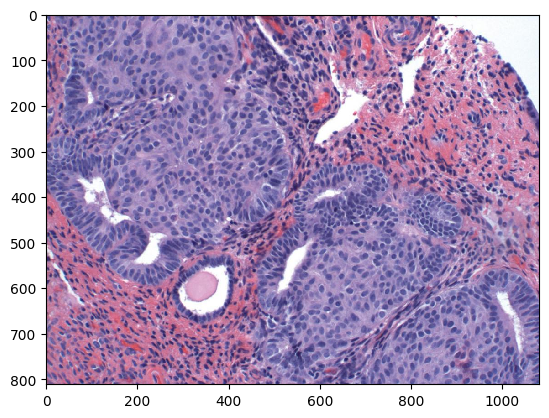

In [51]:
coco_captions.showAnns(captions)
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
